Plot the training loss per epoch. Training this model took about 11 hours.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
log_file = '../logs/training_1643821400.log'
epoch_losses = []
with open(log_file) as f:
  for line in f.readlines():
    if 'test' in line:
      epoch_losses.append(float(line.split(': ')[-1]))
epoch_losses

[0.018025217577815056,
 0.017211686819791794,
 0.016856051981449127,
 0.0166473425924778,
 0.016505273059010506,
 0.016398955136537552,
 0.016315264627337456,
 0.01624535769224167,
 0.016185887157917023,
 0.016133707016706467]

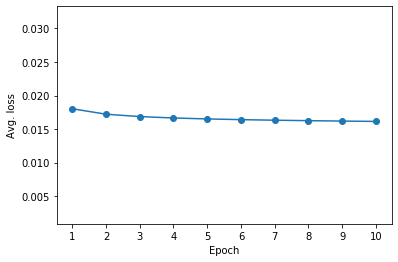

In [3]:
plt.scatter(range(1, len(epoch_losses)+1), epoch_losses)
plt.plot(range(1, len(epoch_losses)+1), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Avg. loss')
plt.xticks(range(1, len(epoch_losses)+1))
plt.show()

In [4]:
all_losses = [[]]
with open(log_file) as f:
  for line in f.readlines():
    if 'batches' in line:
      all_losses[-1].append(-float(line.split(': ')[-1]))
    elif 'Avg. loss of epoch' in line:
      all_losses.append([])
del all_losses[-1]

In [5]:
min_losses, max_losses = [], []
for losses in all_losses:
  min_loss, max_loss = 100, -1
  for loss in losses:
    if loss > max_loss:
      max_loss = loss
    elif loss < min_loss:
      min_loss = loss
  min_losses.append(min_loss)
  max_losses.append(max_loss)

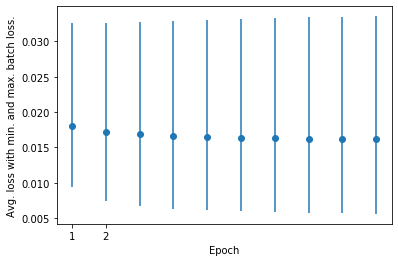

In [6]:
error = np.array([min_losses, max_losses])
plt.errorbar(np.arange(len(epoch_losses)), epoch_losses, yerr=error, fmt='o')
plt.xlabel('Epoch')
plt.ylabel('Avg. loss with min. and max. batch loss.')
plt.xticks(range(len(error)), range(1,len(error)+1))
plt.show()

In [7]:
error

array([[-0.01460425, -0.01542432, -0.01589032, -0.01622123, -0.01651597,
        -0.0167687 , -0.01697543, -0.01714751, -0.01729419, -0.01742144],
       [-0.00862641, -0.00972564, -0.01014331, -0.01030617, -0.01039059,
        -0.01044604, -0.01048363, -0.01050979, -0.01052724, -0.01053943]])